In [1]:
import os
import yaml
from pathlib import Path
import SimpleITK as sitk
from upenn_be5370_utils.sitkview import view_sitk

In [2]:
with open(Path("./config/config.yaml"), "r") as f:
    config = yaml.safe_load(f)

atlas_path = config["path_atlas"]
parcellation_path = config["path_parcellation"]
output_dir = config["path_output"]
transformed_img_dir = Path(output_dir, "transformed_img")
transformed_seg_dir = Path(output_dir, "transformed_seg")

In [3]:
print(f"Atlas path: {atlas_path}")
print(f"Parcellation path: {parcellation_path}")
print(f"Transformed images directory: {transformed_img_dir}")
print(f"Transformed segmentations directory: {transformed_seg_dir}")

transformed_images = sorted(
    [f for f in os.listdir(transformed_img_dir) if f.endswith(".nii.gz")]
)
print(f"\nFound {len(transformed_images)} transformed images:")
for img in transformed_images:
    print(f"  - {img}")

transformed_segmentations = sorted(
    [f for f in os.listdir(transformed_seg_dir) if f.endswith(".nii.gz")]
)

Atlas path: ./atlas/haskins_atlas.nii
Parcellation path: ./atlas/haskins_parcellation.nii
Transformed images directory: output\transformed_img
Transformed segmentations directory: output\transformed_seg

Found 5 transformed images:
  - C1031970_225_T1_ss_norm.nii.gz
  - C1072314_305_T1_ss_norm.nii.gz
  - C111930_194_T1_ss_norm.nii.gz
  - C114759_551_T1_ss_norm.nii.gz
  - C116850_624_T1_ss_norm.nii.gz


Atlas size: (197, 233, 189)
Parcellation size: (197, 233, 189)


(<Figure size 800x451.628 with 4 Axes>, [[<Axes: >], [<Axes: >]])

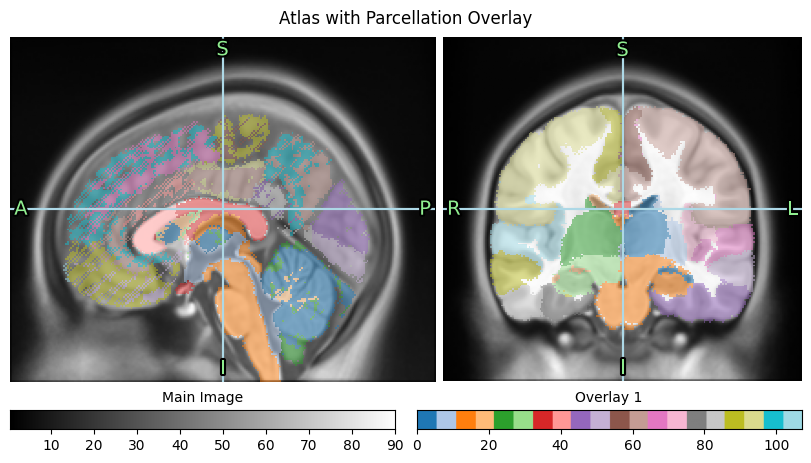

In [4]:
atlas_img = sitk.ReadImage(atlas_path, sitk.sitkFloat32)
parcellation_img = sitk.ReadImage(parcellation_path, sitk.sitkUInt32)

print(f"Atlas size: {atlas_img.GetSize()}")
print(f"Parcellation size: {parcellation_img.GetSize()}")

view_sitk(
    atlas_img,
    parcellation_img,
    cmap=["gray", "tab20"],
    title="Atlas with Parcellation Overlay",
)

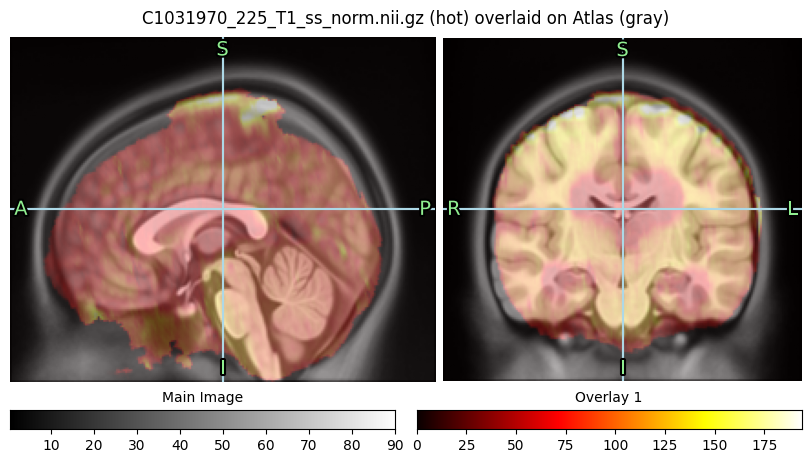

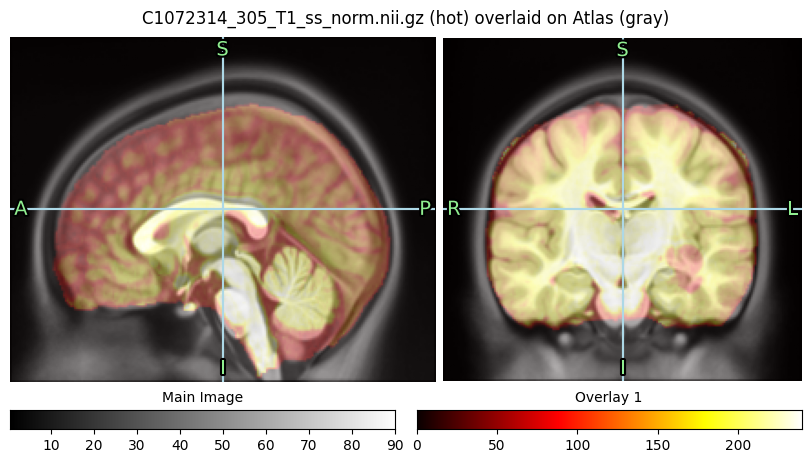

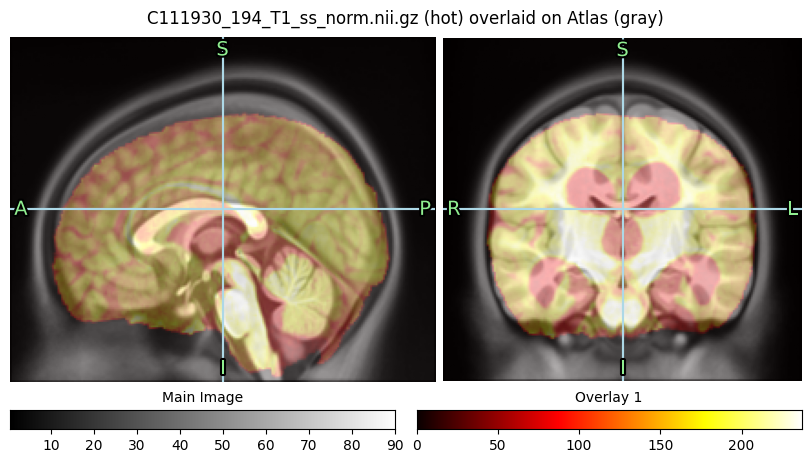

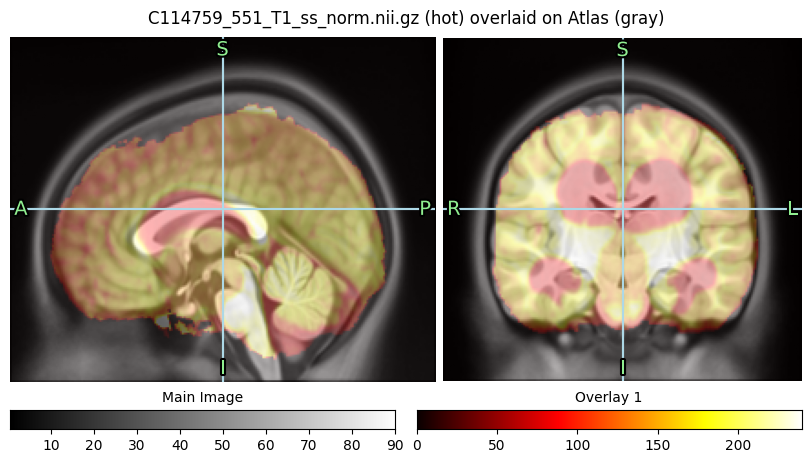

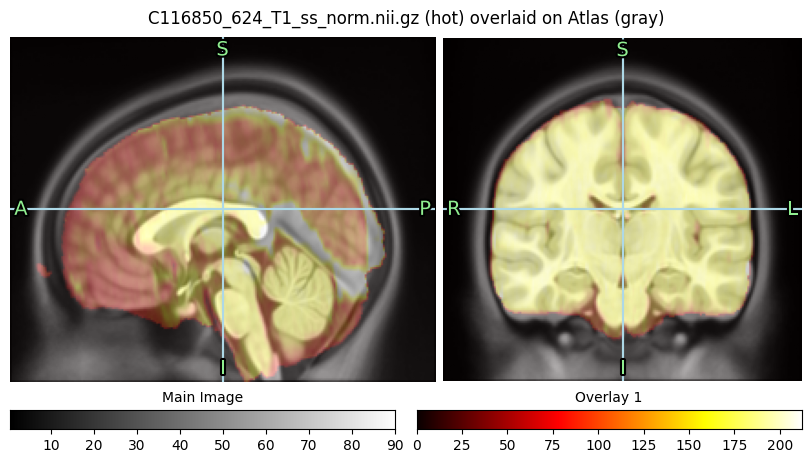

In [5]:
for img_filename in sorted(transformed_images):
    img_path = Path(transformed_img_dir, img_filename)
    transformed_img = sitk.ReadImage(img_path)

    view_sitk(
        atlas_img,
        transformed_img,
        cmap=["gray", "hot"],
        title=f"{img_filename} (hot) overlaid on Atlas (gray)",
        alpha=0.3,
    )

c:\Users\m\Documents\run-synthmorph\.venv\Lib\site-packages\upenn_be5370_utils\sitkview.py:438: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax_cb.imshow(np.linspace(vmin_adj[j], vmax_adj[j], 256)[None,:],


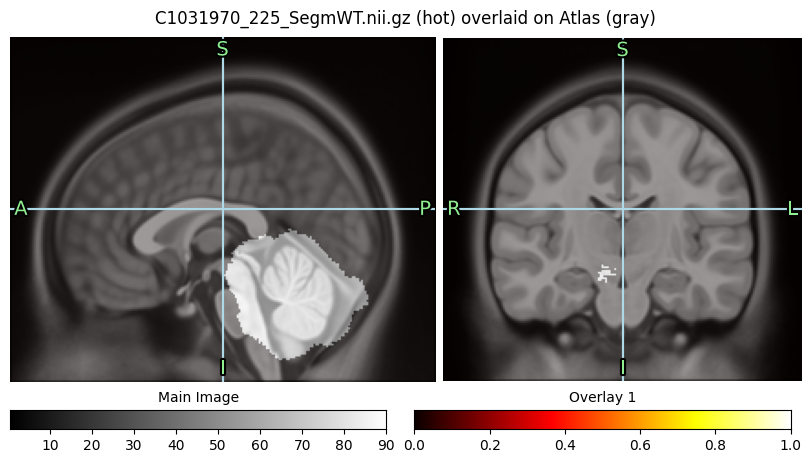

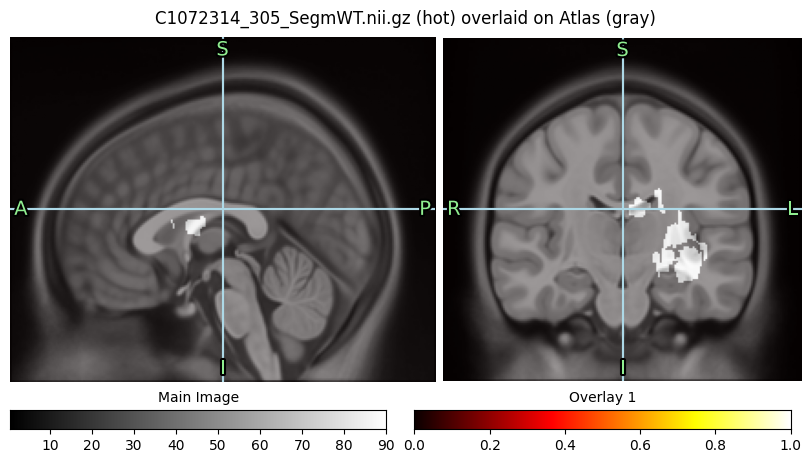

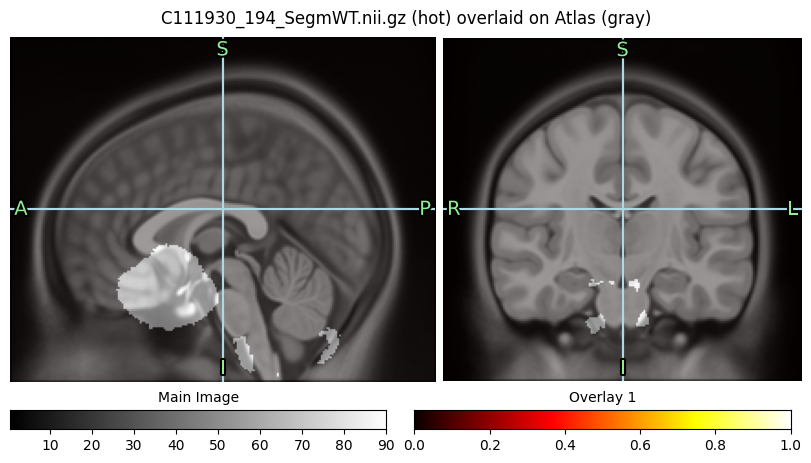

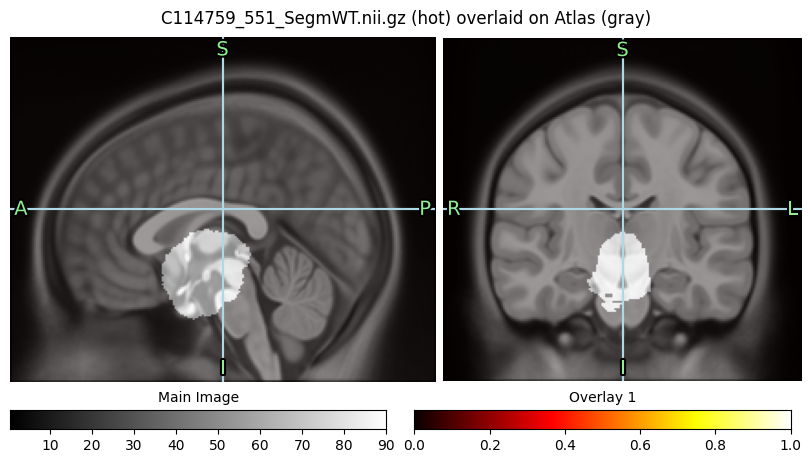

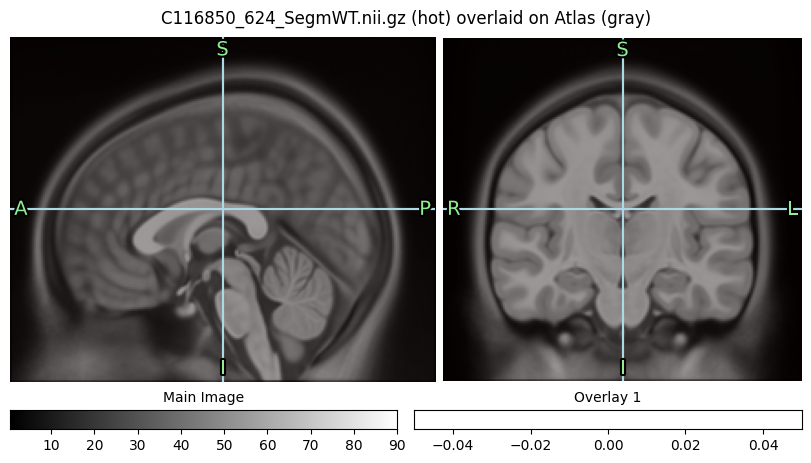

In [6]:
for seg_filename in sorted(transformed_segmentations):
    seg_path = Path(transformed_seg_dir, seg_filename)
    transformed_seg = sitk.ReadImage(seg_path, sitk.sitkUInt8)

    view_sitk(
        atlas_img,
        transformed_seg,
        cmap=["gray", "hot"],
        title=f"{seg_filename} (hot) overlaid on Atlas (gray)",
        alpha=0.4,
    )